In [144]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import random


In [145]:
with open("cnn_config.json",'r') as f:
    config = json.load(f)

input_dir = config["input_dir"]
model_path = config["output"]["model_path"]    
metrics_json = config["output"]["metrics_json"]
acc_loss_plot= config["output"]["accuracy_loss_plot"]
confusion_plot = config["output"]["confusion_matrix_plot"]

In [146]:
image_size = (128,128)
batch_size = 32
epochs = 30
patience = 10

In [147]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

In [148]:
train_gen = train_datagen.flow_from_directory(
    input_dir,
    target_size = image_size,
    color_mode = 'grayscale',
    batch_size = batch_size,
    class_mode  = 'categorical',
    subset = 'training',
    shuffle = True


)

val_gen = val_datagen.flow_from_directory(
    input_dir,
    target_size = image_size,
    color_mode = 'grayscale',
    batch_size = batch_size,
    class_mode   = 'categorical',
    subset = 'validation',
    shuffle = False
)


Found 694 images belonging to 2 classes.


Found 173 images belonging to 2 classes.


In [149]:
num_classes = len(train_gen.class_indices)
class_names = list(train_gen.class_indices.keys())


In [150]:
def built_model(input_shape=(128,128,1),num_classes=2):
    model=Sequential([
        Conv2D(32,(3,3),activation='relu',padding='same',input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(64,(3,3),activation='relu',padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(128,(3,3),activation='relu',padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Flatten(),

        Dense(256,activation='relu'),
        Dropout(0,5),
        Dense(num_classes,activation='softmax')
    ])
    return model

In [151]:
model=built_model(input_shape=(128,128,1),num_classes=num_classes)
model.compile(optimizer ='adam',loss ='categorical_crossentropy',metrics =['accuracy'])

c:\Users\User-AI-D-28\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=patience,restore_best_weights=True)
    ]
)


c:\Users\User-AI-D-28\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


c:\Users\User-AI-D-28\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6254 - loss: 4.5040 - val_accuracy: 0.4162 - val_loss: 11.4474
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 921ms/step - accuracy: 0.6513 - loss: 0.7194 - val_accuracy: 0.4162 - val_loss: 22.3240
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 954ms/step - accuracy: 0.6916 - loss: 0.5896 - val_accuracy: 0.4162 - val_loss: 25.8314
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 952ms/step - accuracy: 0.7219 - loss: 0.5731 - val_accuracy: 0.4162 - val_loss: 32.4051
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 937ms/step - accuracy: 0.7666 - loss: 0.5051 - val_accuracy: 0.4162 - val_loss: 35.1205
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 954ms/step - accuracy: 0.7522 - loss: 0.5145 - val_accuracy: 0.4162 - val_loss: 38.7761
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 958ms/step - accuracy: 0.7666 - loss: 0.4812 - val_accuracy: 0.4162 - val_loss: 41.0164
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 975ms/step - accuracy: 0.7911 - loss: 0.4693 - val_accuracy: 0

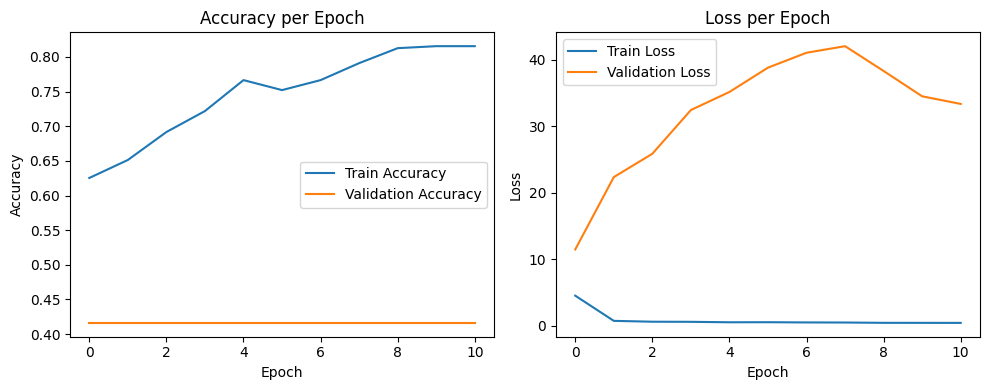

In [155]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

plt.tight_layout()
plt.savefig(acc_loss_plot)
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 593ms/step


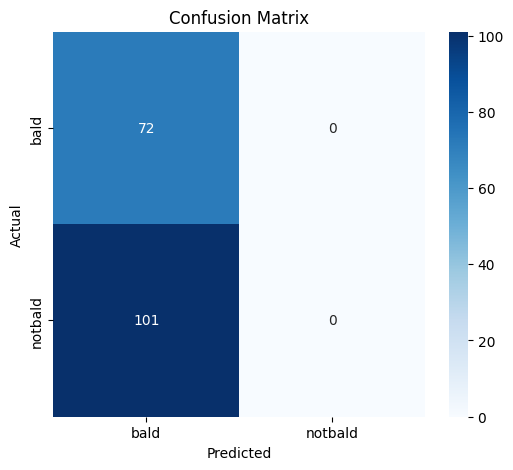

 Training completed. Model and outputs saved with improved architecture.


c:\Users\User-AI-D-28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User-AI-D-28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User-AI-D-28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [156]:
val_gen.reset()
y_true = val_gen.classes
y_pred = np.argmax(model.predict(val_gen), axis=1)


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(confusion_plot)
plt.show()

report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
final_acc = accuracy_score(y_true, y_pred)

metadata = {
    "final_accuracy": final_acc,
    "classification_report": report,
    "train_accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "train_loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open(metrics_json, "w") as f:
    json.dump(metadata, f, indent=4)

print(" Training completed. Model and outputs saved with improved architecture.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Text(0.5, 1.05, 'Predictions on 30 Random Images')

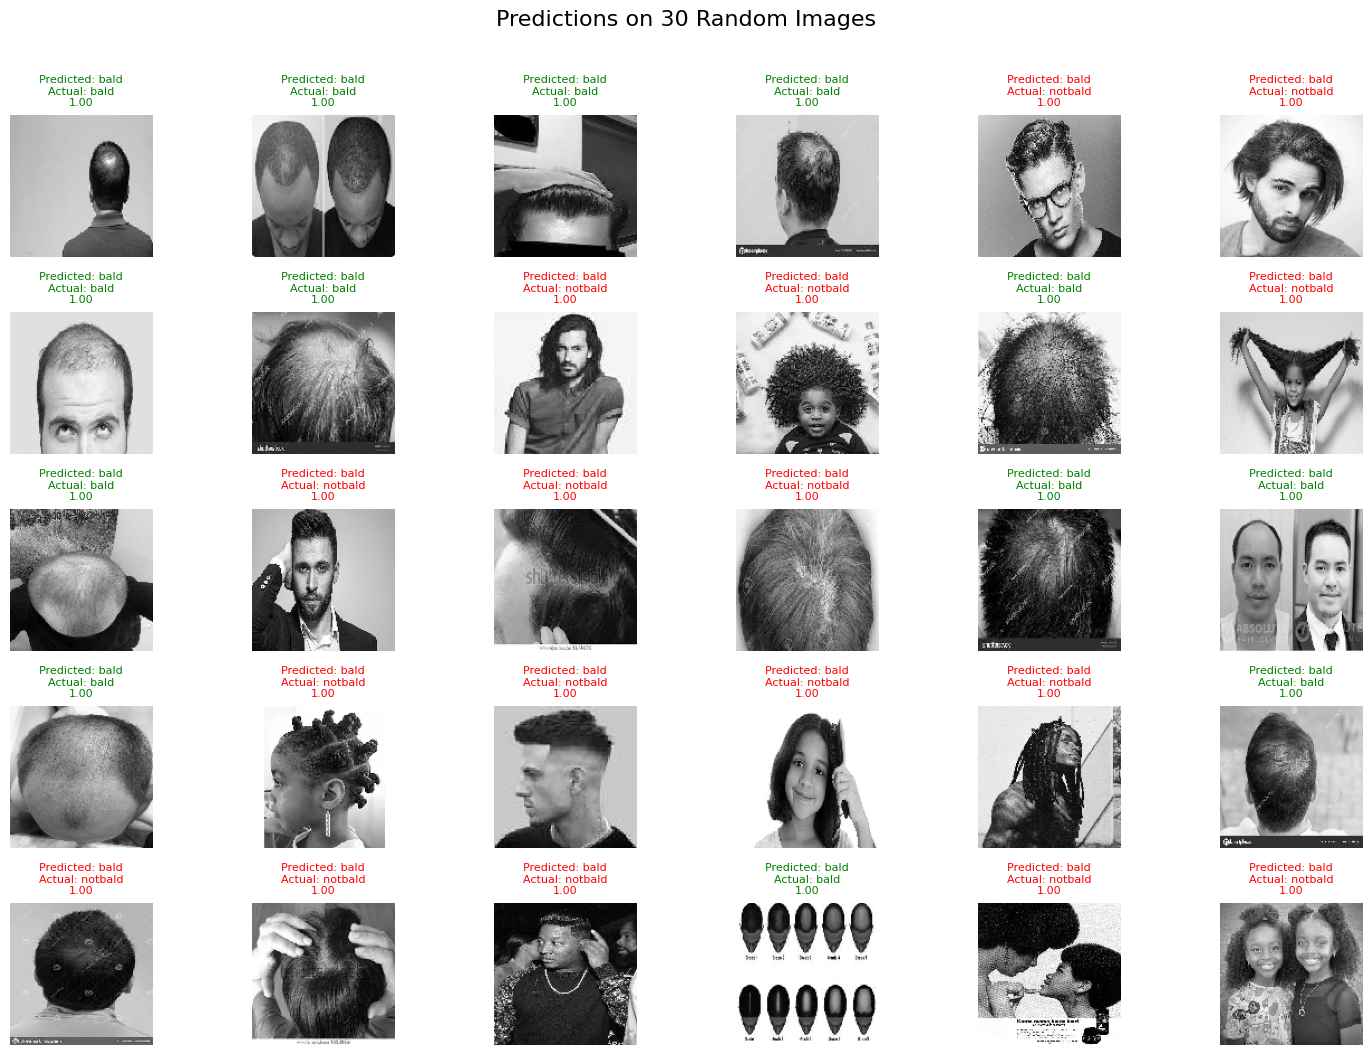

In [157]:
file_paths = []
for class_name in class_names:
    class_folder = os.path.join(input_dir, class_name)
    for fname in os.listdir(class_folder):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_paths.append((os.path.join(class_folder, fname), class_name))

sample_images = random.sample(file_paths, 30)

plt.figure(figsize=(15, 10))
for i, (img_path, true_label) in enumerate(sample_images):
    img = load_img(img_path, color_mode='grayscale', target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    pred_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)

    plt.subplot(5, 6, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {pred_class}\nActual: {true_label}\n{confidence:.2f}",
              fontsize=8, color='green' if pred_class == true_label else 'red')

plt.tight_layout()
plt.suptitle("Predictions on 30 Random Images", fontsize=16, y=1.05)